# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

Для начала -- загрузим данные

In [5]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Решаем задачу задачу бинарной классификации. Целевая переменная -- 0 или 1, где:
0 -- no disease,
1 -- disease

Таким образом, нам по характеристам каждого человека надо понять, болен ли он

In [8]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

Классы +- сбалансированы. Посмотрим на пропуски в данных

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Ваще огонь! пропусков совершенно не оказалось

Посмотрим еще раз на признаки:

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Можем заметить, что есть признаки с разными диапазонами значений. Такое  дело лучше стандартизовать

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,1,2,-0.812095,0,-0.820813,1,1,0,0
1,1.600302,0,0,0.468418,-0.160859,0,0,0.061157,0,0.639470,0,2,0,0
2,1.268242,0,0,1.032342,-0.411292,0,0,-1.554358,0,1.326662,2,0,0,0
3,1.157555,1,0,0.355633,0.667499,1,2,1.065396,0,0.295874,1,1,0,1
4,1.046868,1,0,-1.223355,-0.700254,0,2,-0.244481,1,0.639470,1,0,0,0


Построим теперь корреляционную матрицу, чтобы посмотреть, какие признаки плохо коррелирует с таргетным значением:

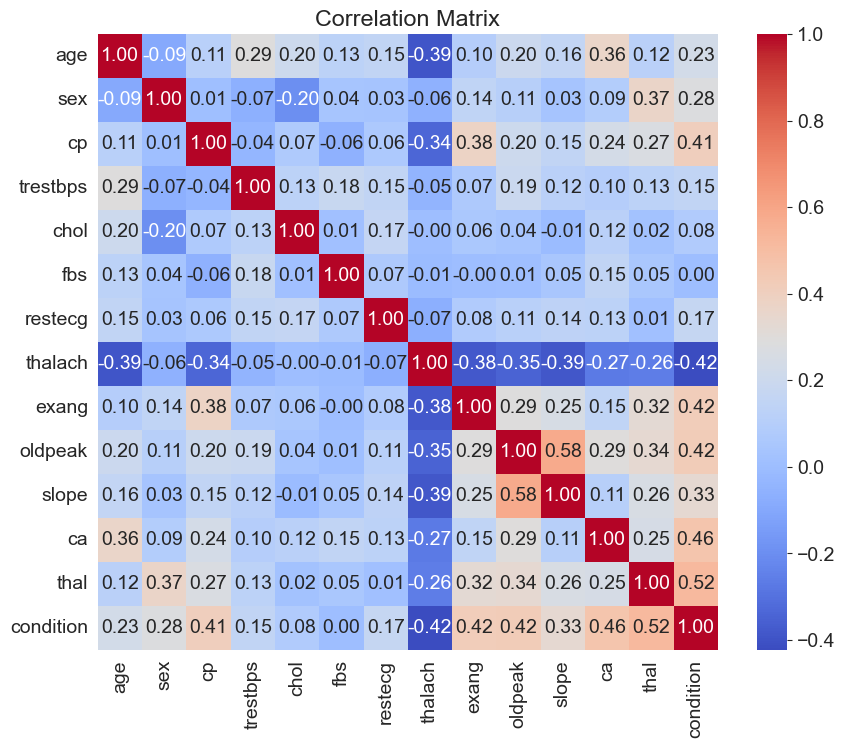

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Есть ощущение, что признак fbs мало влияет на таргет, в силу того, что в таблице корреляции -- значение 0.

Посмотрим подробнее на его корреляцию с другими признаками:

In [13]:
corr_with_others = df.corr()['fbs']
print(corr_with_others)

age          0.132062
sex          0.038850
cp          -0.057663
trestbps     0.180860
chol         0.012708
fbs          1.000000
restecg      0.068831
thalach     -0.007842
exang       -0.000893
oldpeak      0.008311
slope        0.047819
ca           0.152086
thal         0.051038
condition    0.003167
Name: fbs, dtype: float64


Есть ощущение, что он немного избыточен. Можем его убрать

In [14]:
df.drop('fbs', inplace=True, axis=1)

df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,1,0,1.596266,-0.257179,2,-0.812095,0,-0.820813,1,1,0,0
1,1.600302,0,0,0.468418,-0.160859,0,0.061157,0,0.639470,0,2,0,0
2,1.268242,0,0,1.032342,-0.411292,0,-1.554358,0,1.326662,2,0,0,0
3,1.157555,1,0,0.355633,0.667499,2,1.065396,0,0.295874,1,1,0,1
4,1.046868,1,0,-1.223355,-0.700254,2,-0.244481,1,0.639470,1,0,0,0


Разделим данные на тренировочную и тестовую выборки

In [15]:
from sklearn.model_selection import train_test_split

X, y = df.drop('condition', axis=1), df['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Обучим простую логистическую регрессию

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

Посмотрим, какие метрики мы получим

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

ROC AUC Score: 0.9408482142857143


В целом, получилось очень хорошо.

**Давайте заметим один момент...**

Если мы не хотим говорить больным людям, что они здоровые, то по сути, мы уменьшить долю **False Negative**. Т.к. FN -- это как раз и есть тот случай, когда мы больному (1) говорим, что он здоровый (0). Т.е. мы хотим увеличить Recall.
Recall = TP / (TP + FN)

Это очень важный момент, ведь наша обученная модель показывает следующие соотношения:

**Precision = 1;
Recall = 0.79**

***Что означает precision?***

Precision = TP / (TP + FP)

FP -- количество здоровых, которым сказали, что они больные. Конечно, тоже неприятно (но гораздо хуже, когда наоборот).

 Precision у нас получился равным 1, а значит, что FP = 0. Это очень хорошо.

## Как теперь увеличить Recall?*

По сути, мы можем выбрать другой порог классификации. Например, чтобы он был ниже. Что нам это даст? Мы будем чаще охотнее классифицировать пациентов больными. Т.е., уменьшем количество пропусков больных, которые были классифицированы как здоровые. Давйте попробуем

In [18]:
y_probs = y_pred_proba[:, 1]
threshold_1 = 0.4
y_pred_1 = (y_probs >= threshold_1).astype(int)

Посмотрим на получившиеся метрики:

In [19]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



## Уже лучше! Попробуем еще:

In [20]:
y_probs = y_pred_proba[:, 1]
threshold_2 = 0.3
y_pred_2 = (y_probs >= threshold_1).astype(int)

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



В целом, показатели уже не улучшаются. Вероятнее всего, порог 0.4 -- является оптимальным.

И, как мы можем заметить, recall, равный 0.82 - довольно хороший результат. Можно считать, что задача под звёздочкой решена